# Sales Analysis

---------------------

## Import Necessary Libraries

In [114]:
import matplotlib.pyplot as plt
import os
import pandas as pd 
import seaborn as sns



#### Merging 12 months of sales data into one sigle file

In [84]:
files = [file for file in os.listdir('./Sales_Data')]

complete_data = pd.DataFrame()

for file in files:
    data = pd.read_csv("./Sales_Data/"+file)
    complete_data = pd.concat([complete_data,data])
complete_data.to_csv('All_months.csv', index = False)

In [85]:
df = pd.read_csv('All_months.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB


In [87]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

## Cleaning the data

#### I check if missing data are missing in every column, so I looked into it.

In [88]:
tmp = df[df.Product.isna()]
tmp

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
69,NaN,NaN,NaN,NaN,NaN,NaN
138,NaN,NaN,NaN,NaN,NaN,NaN
544,NaN,NaN,NaN,NaN,NaN,NaN
546,NaN,NaN,NaN,NaN,NaN,NaN
781,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


#### As I expected there are missing rows, so I will drop them and see if I have some missing values left. 

In [89]:
df = df.dropna(how = 'all')

In [90]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### No missing values left so for now data is ready to be analyzed

### Augment Data with additional columns

#### Add Month column

In [91]:
df = df.rename(columns = {'Order Date' : 'Order_Date'})

In [92]:
df['Order_Date'] = df.Order_Date.astype('object')

In [93]:
df['Month'] = df.Order_Date.apply(lambda x: x.split('/')[0])

In [94]:
df.Month.unique()

array(['11', '12', 'Order Date', '05', '06', '08', '09', '07', '04', '02',
       '03', '01', '10'], dtype=object)

In [96]:
df = df.loc[df['Month'] != 'Order Date']

In [100]:
df['Month'] = df.Month.astype('int32')

#### Add a sales column

In [102]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')

In [103]:
df['Price Each'] = df['Price Each'].astype('float64')

In [104]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [105]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order_Date,Purchase Address,Month,Sales
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99


## Best Sales month

In [125]:
best_sales = df.groupby('Month').Sales.sum()
best_sales

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

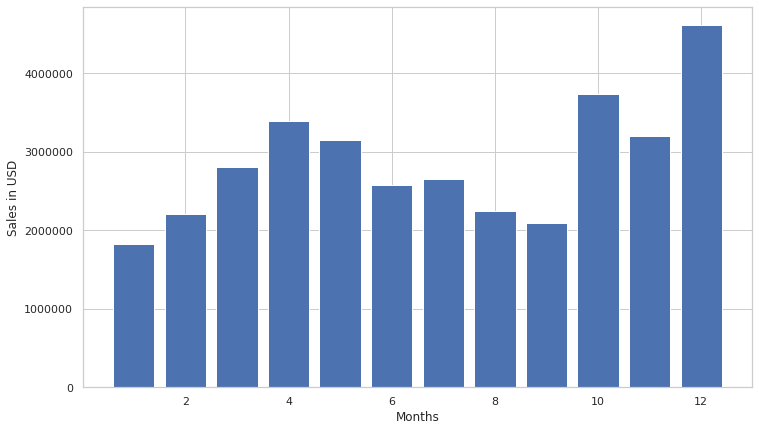

In [135]:
months = range(1,13)

plt.figure(figsize = (12,7))
plt.bar(months,best_sales)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()